# Lasso Regression

Using Lasso Regression to estimate `ViolentCrimesPerPop` based on the dataset provided

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lasso import load_data
%matplotlib inline

# load all the data
X_train, y_train, X_val, y_val, X_test, y_test, df_train, df_test = load_data('data', validation=True, split=0.9)
# X_train, y_train, X_test, y_test, df_train, df_test = load_data('data')

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1. Building the Models
First we use the `lasso_models` method to get `W` that is a `10x95` matrix that has parameter for all 10 values of `lambda` or `reg`

In [2]:
from lasso import lasso_models
# build models for all 10 lamdas
regs = np.array([600.0 / (2 ** i) for i in range(10)])
W = lasso_models(X_train, y_train, regs)

## 2. Plot: Regularization Paths
The regularization paths (in one plot) for the coefficients for input variables agePct12t29,
pctWSocSec, PctKids2Par, PctIlleg, and HousVacant — use log(λ) instead of λ.

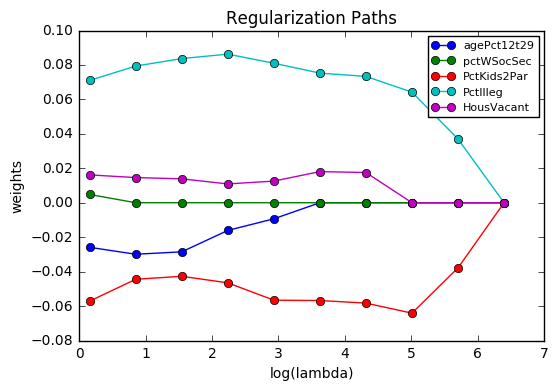

In [3]:
from lasso import plot_regpath
# plot regularization paths
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']
ids = [df_train.columns.get_loc(feature) - 1 for feature in features]
plot_regpath(W, regs, features, ids)

## 3. Plot: Squared Error In The Training Dataset

A plot of log(λ) against the squared error in the training data.

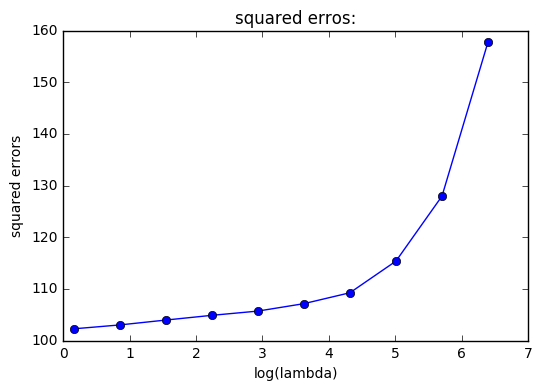

In [4]:
from lasso import plot_sqerr
# plot squared errors for training data
plot_sqerr(X_train, y_train, W, regs)

## 4. Plot: Squared Error In Test Dataset
A plot of log(λ) against the squared error in the test data.

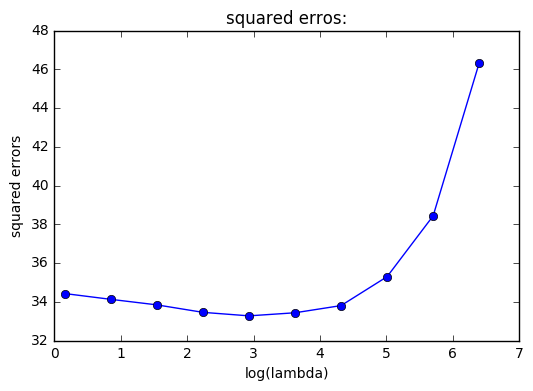

In [5]:
# plot squared errors for testing data
plot_sqerr(X_test, y_test, W, regs)

## 5. Plot: Number of Non-Zero Coefficients
A plot of λ against the number of nonzero coefficients

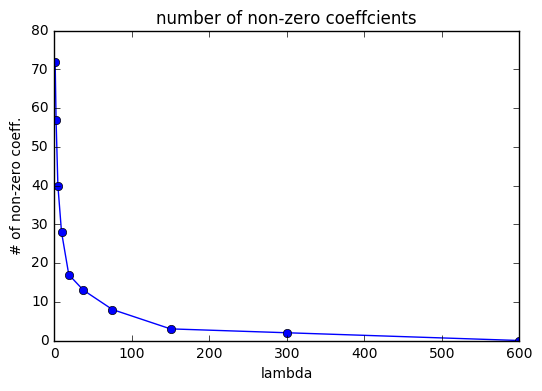

In [6]:
from lasso import plot_nonzero
# plot number of non-zero coeffcients
plot_nonzero(W, regs)

## 6. Hyper Parameter Tuning: λ

In this section, we will use the validation dataset to tune the hyper parameter λ.

We find the λ (reg) for which the validation error is the least. Since the model wasn't trained on the validation set and we have enough data we just use a 10% split on the original training set for the validation set. This gives us a good approximation for the error.

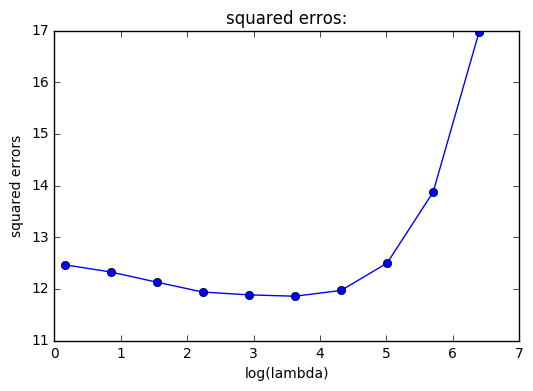

best validation error at reg=37.5


In [7]:
from lasso import tune_reg
plot_sqerr(X_val, y_val, W, regs)
best_reg = tune_reg(X_val, y_val, W, regs)
print 'best validation error at reg=' + str(best_reg)

## 7. Largest & Smallest Coefficient For Best λ

Maximum: PctIlleg: percentage of kids born to never married (numeric - decimal)
Minimum: PctKids2Par: percentage of kids in family housing with two parents (numeric - decimal)

After looking at the largest positive weight it shows that houses wih higher 'percentage of kids born to never married' leads to a higher crime rate

After looking at the largest negative weight it shows that houses with higher 'percentage of kids in family housing with two parents' leads to lower crime rate

In [8]:
from lasso import max_min_w
max_w_i, min_w_i = max_min_w(df_train, W, regs, best_reg)
print 'Maximum Parameter: ' + max_w_i + ' and Minimum Parameter: ' + min_w_i 

Maximum Parameter: PctIlleg and Minimum Parameter: PctKids2Par
